In [1]:
# Thomas Glucksman
# AMATH 584 Homework 2, Eigenfaces exploration
# Due 10/16/20

import matplotlib.pyplot as plt
import numpy as np
import os

# Exploration of PCA with facial imagery
# Given a dataset of face images, we will compile them into one data matrix and perform SVD in order to separate them into their principal components

# set directories
imgdir_cr = "yalefaces\yale_cropped"
imgdir_ucr = "yalefaces\yale_uncropped"

# plot parameters
plt.rcParams['figure.figsize'] = [5,5]

[[80 80 84 ... 63 67 71]
 [81 79 78 ... 60 61 64]
 [80 79 82 ... 61 59 62]
 ...
 [12 12 19 ... 21 18 14]
 [12 12 15 ... 14 14 14]
 [12 12 12 ... 12 12 11]]
(192, 168)


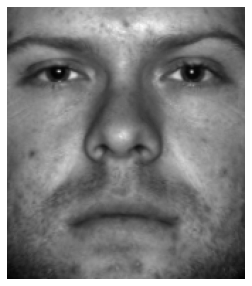

In [2]:
# Try reading in first face and plotting
img1 = plt.imread(os.path.join(imgdir_cr, "yaleB01", "yaleB01_P00A+000E+00.pgm"))

# show image as data matrix
print(img1)

# matrix dimensions
print(img1.shape)

# plot
plot = plt.imshow(img1)
plot.set_cmap('gray')
plt.axis('off')
plt.show(plot)

In [3]:
# Read in all cropped images and and reshape each into a column vector, then save as a matrix 

# initialize empty arrays
cvecs = []


# creating data matrix of all face images

for root, dirs, files in os.walk(imgdir_cr): 
    for file in files:
        img = plt.imread(os.path.join(root, file))
        m = img.shape[0]
        n = img.shape[1]
        c = np.reshape(img, [m*n,1])
        cvecs.append(c)

# save as matrix
A = np.mat(np.array(cvecs)).T # transpose so each image is a column vector, matrix is [m*n,(number of images)]


In [4]:
# 1. Do an SVD analysis of the images (where each image is reshaped into a column vector and each column is a new image)
U, S, VT = np.linalg.svd(A, full_matrices = 0)

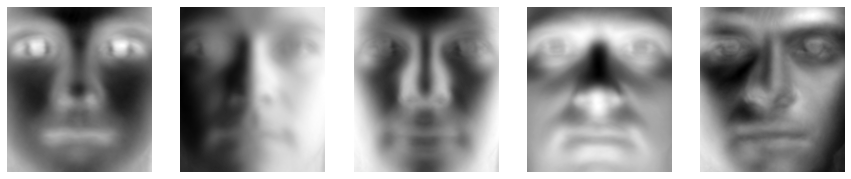

In [5]:
# 2. What is the interpretation of the U, S, and VT matrices? (Plot the first few reshaped columns of U)

# set figure parameters
fig, axs = plt.subplots(1,5, figsize=(15,15))
plt.set_cmap('gray')

# plot the first 5 columns of U
# reshape the columns back into matrices and plot
for i in np.arange(5):
    img = np.reshape(U[:,i], (m,n))
    axs[i].imshow(img)
    axs[i].axis('off')


# The matrix U represents the eigenface space. In SVD, the colummns of U represent the principal directions of our matrix A. In other words, these are the eigenvectors ordered by most to least important in terms of direction. In the context of facial recognition, the first column of U corresponds to the average face, which describes the most common features shared among all faces in the dataset. The following columns of U describe features of the faces where there is more variation, which means that these directions are increasing less important in describing each face.

# The matrix S is a diagonal matrix of singular values, or the eigenvalues for each eigenvector in U. These tell us which vectors in U are most influential for the average face. These are ordered for greatest to smallest, which implies that the column vectors of U follow a similar pattern of importance. 

# The matrix VT describes how each individual data vector in A projects onto the principal directions in U. 
    

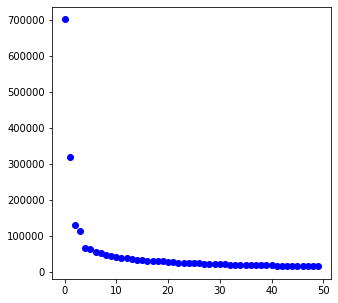

In [6]:
# 3. What does the singular value spectrum look like and how many modes are necessary for good image reconstructions using the PCA basis? (i.e. what is the rank r of the face space?)

# plotting the first 50 singular values
plt.plot(S[0:50], 'bo')

# We see that there is an exponential decay immediately after the first singular value. This indicates that the majority of facial features are determined by the first 4-5 principal components, whereas the remainder have only a marginal contribution. 

Text(0.5, 1.0, 'Original image')

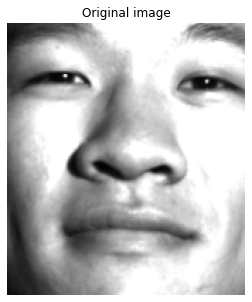

In [7]:
# Now we shall determine the number of modes necessary for accurate image reconstructions

# take a random face from A and plot to see original image
img_test = A[:,808]


plt.imshow(np.reshape(A[:,808], (m,n)))
plt.axis('off')
plt.title('Original image')

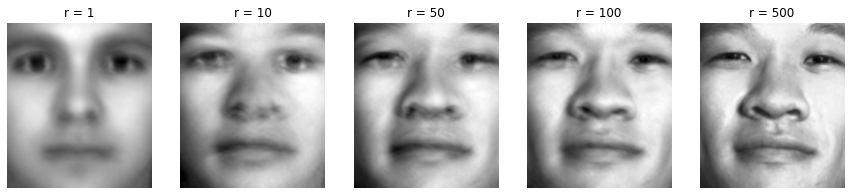

In [8]:
# Now, since U are the principal components of every face in A, we will determine how many columns of U are needed to accurately reconstruct this face. 
avg_face = np.mean(A, axis=1)

# set figure parameters
fig, axs = plt.subplots(1,5, figsize=(15,15))
plt.set_cmap('gray')

# vector of modes
r = [1, 10,50,100,500]

# reconstruct face for each mode
for i in np.arange(5):
    reconFace = avg_face + U[:,:r[i]] @ (U[:,:r[i]].T @ img_test)
    axs[i].imshow(np.reshape(reconFace, (m,n)))
    axs[i].axis('off')
    axs[i].set_title("r = " + str(r[i]))
    
# We observe that it takes approximately 500 columns of U to accurately reconstruct this image, so we can infer that the rank of U is actually around 500 for the purposes of face reconstruction.

In [9]:
# 4. Compare the difference between the cropped (and aligned) versus uncropped images in terms of singular value decay and reconstruction capabilities

# We will repeat the above for the uncropped image dataset:
# Read in all cropped images and and reshape each into a column vector, then save as a matrix 

# initialize empty arrays
cvecs = []


# creating data matrix of all face images

for root, dirs, files in os.walk(imgdir_ucr): 
    for file in files:
        img = plt.imread(os.path.join(root, file))
        m = img.shape[0]
        n = img.shape[1]
        c = np.reshape(img, [m*n,1])
        cvecs.append(c)

# save as matrix
A = np.mat(np.array(cvecs)).T # transpose so each image is a column vector, matrix is [m*n,(number of images)]

In [22]:
# Perform SVD on uncropped images
U, S, VT = np.linalg.svd(A, full_matrices=0)

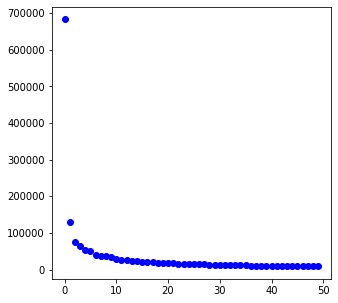

In [23]:
# plotting the first 50 singular values
plt.plot(S[0:50], 'bo')

# There is a similar pattern of decay for this dataset compared to the cropped images. However, the drop off occurs much sooner in the uncropped images than with the cropped images. In the cropped image set, the first 5 singular values were significantly greater than the rest, whereas here only the first 2 appear to have this degree of significance. 

Text(0.5, 1.0, 'Original image')

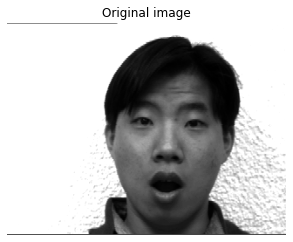

In [24]:
# Now let's reconstruct one of the uncropped images similar to how we did before

# Now we shall determine the number of modes necessary for accurate image reconstructions

# take a random face from A and plot to see original image
img_test = A[:,42]


plt.imshow(np.reshape(A[:,42], (m,n)))
plt.axis('off')
plt.title("Original image")

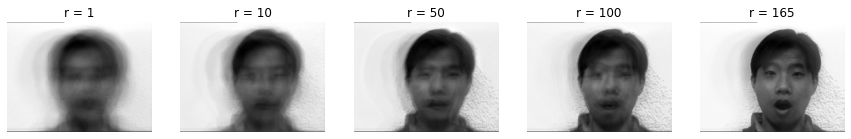

In [25]:
avg_face = np.mean(A, axis=1)

# set figure parameters
fig, axs = plt.subplots(1,5, figsize=(15,15))
plt.set_cmap('gray')

# vector of modes
r = [1, 10,50,100,165]

# reconstruct face for each mode
for i in np.arange(5):
    reconFace = avg_face + U[:,:r[i]] @ (U[:,:r[i]].T @ img_test)
    axs[i].imshow(np.reshape(reconFace, (m,n)))
    axs[i].axis('off')
    axs[i].set_title("r = " + str(r[i]))



# Here we see that even when using all the columns of U, the reconstructed image still contains some obvious imperfections and blurriness. This suggests that for these uncropped images, we would require more data to form a more robust eigenface space, since there is a lot more variation in the values for each image matrix. These images contain more features of the whole face, as well as some other random features that are not part of the face, such as the neck, shoulders, and background noise. 